

Comprehensive analysis of the Android app market by comparing thousands of apps in the Google Play store.

# Import Statements

In [62]:
import pandas as pd
import numpy as np
import plotly.express as px

In [63]:
df_apps = pd.read_csv('apps.csv')

# Data Cleaning

In [64]:
df_apps.shape

(10841, 12)

In [65]:
df_apps.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.7,0,Paid,$13.99,Teen,Social,"July 28, 2017",4.1 and up
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.0,0,Paid,$2.99,Everyone,Education,"April 15, 2016",3.0 and up
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.5,0,Paid,$1.49,Everyone,Personalization,"July 11, 2018",4.2 and up
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.0,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device
4,CX Network,BUSINESS,NaN,0,10.0,0,Free,0,Everyone,Business,"August 6, 2018",4.1 and up


In [66]:
df_apps.sample(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
10737,Snapchat,SOCIAL,4.0,17015352,5.3,"500,000,000",Free,0,Teen,Social,"July 30, 2018",Varies with device
1931,FE Civil Engineering Exam Prep,FAMILY,2.8,9,21.0,"1,000",Free,0,Everyone,Education,"July 27, 2018",5.0 and up
4051,DK Pittsburgh Sports,SPORTS,4.1,556,3.3,"10,000",Free,0,Everyone,Sports,"July 26, 2018",4.2 and up
9642,McDonald's,FOOD_AND_DRINK,3.6,145646,42.0,"10,000,000",Free,0,Everyone,Food & Drink,"July 31, 2018",4.4 and up
3713,Patience Words,LIBRARIES_AND_DEMO,NaN,31,3.4,"10,000",Free,0,Everyone,Libraries & Demo,"December 14, 2017",4.0.3 and up


### Drop Unused Columns

Remove the columns called `Last_Updated` and `Android_Version` from the DataFrame for a hypothetical case that these columns are not useful.

In [67]:
df_apps.drop(['Last_Updated', 'Android_Ver'], axis=1, inplace=True)
df_apps.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.7,0,Paid,$13.99,Teen,Social
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.0,0,Paid,$2.99,Everyone,Education
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.5,0,Paid,$1.49,Everyone,Personalization
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.0,0,NaN,0,Everyone 10+,Strategy
4,CX Network,BUSINESS,NaN,0,10.0,0,Free,0,Everyone,Business


### Find and Remove NaN values in Ratings

In [68]:
nan_rows = df_apps[df_apps.Rating.isna()]
print(nan_rows.shape)
nan_rows.head()

(1474, 10)


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.7,0,Paid,$13.99,Teen,Social
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.0,0,Paid,$2.99,Everyone,Education
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.5,0,Paid,$1.49,Everyone,Personalization
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.0,0,NaN,0,Everyone 10+,Strategy
4,CX Network,BUSINESS,NaN,0,10.0,0,Free,0,Everyone,Business


In [69]:
df_apps_clean = df_apps.dropna()
df_apps_clean.shape

(9367, 10)

### Find and Remove Duplicates


In [70]:
duplicated_rows = df_apps_clean[df_apps_clean.duplicated()]
print(duplicated_rows.shape)
duplicated_rows.head()

(476, 10)


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
946,420 BZ Budeze Delivery,MEDICAL,5.0,2,11.0,100,Free,0,Mature 17+,Medical
1133,MouseMingle,DATING,2.7,3,3.9,100,Free,0,Mature 17+,Dating
1196,"Cardiac diagnosis (heart rate, arrhythmia)",MEDICAL,4.4,8,6.5,100,Paid,$12.99,Everyone,Medical
1231,Sway Medical,MEDICAL,5.0,3,22.0,100,Free,0,Everyone,Medical
1247,Chat Kids - Chat Room For Kids,DATING,4.7,6,4.9,100,Free,0,Mature 17+,Dating


In [71]:
df_apps_clean[df_apps_clean.App == 'Instagram']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.5,66577313,5.3,"1,000,000,000",Free,0,Teen,Social
10808,Instagram,SOCIAL,4.5,66577446,5.3,"1,000,000,000",Free,0,Teen,Social
10809,Instagram,SOCIAL,4.5,66577313,5.3,"1,000,000,000",Free,0,Teen,Social
10810,Instagram,SOCIAL,4.5,66509917,5.3,"1,000,000,000",Free,0,Teen,Social


In [72]:
df_apps_clean = df_apps_clean.drop_duplicates()

In [73]:
df_apps_clean[df_apps_clean.App == 'Instagram']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.5,66577313,5.3,"1,000,000,000",Free,0,Teen,Social
10808,Instagram,SOCIAL,4.5,66577446,5.3,"1,000,000,000",Free,0,Teen,Social
10810,Instagram,SOCIAL,4.5,66509917,5.3,"1,000,000,000",Free,0,Teen,Social


In [74]:
# specify the subset for indentifying duplicates
df_apps_clean = df_apps_clean.drop_duplicates(subset=['App', 'Type', 'Price'])
df_apps_clean[df_apps_clean.App == 'Instagram']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.5,66577313,5.3,"1,000,000,000",Free,0,Teen,Social


In [75]:
df_apps_clean.shape

(8199, 10)

# Find Highest Rated Apps

In [76]:
df_apps_clean.sort_values('Rating', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.0,4,25.0,1,Free,0,Everyone,Medical
1751,Spine- The dating app,DATING,5.0,5,9.3,500,Free,0,Teen,Dating
1761,Selfie With Champion AJ Style,PHOTOGRAPHY,5.0,2,7.5,500,Free,0,Everyone,Photography
1763,Ag Valley Cooperative,BUSINESS,5.0,6,74.0,500,Free,0,Everyone,Business
1769,Yazdani Cd Center EllahAbad Official App,FAMILY,5.0,8,3.8,500,Free,0,Everyone,Entertainment


# Find 5 Largest Apps in terms of Size (MBs)

In [77]:
df_apps_clean.sort_values('Size_MBs', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
8719,Draft Simulator for FUT 18,SPORTS,4.6,162933,100.0,"5,000,000",Free,0,Everyone,Sports
8718,Mini Golf King - Multiplayer Game,GAME,4.5,531458,100.0,"5,000,000",Free,0,Everyone,Sports
10295,SimCity BuildIt,FAMILY,4.5,4218587,100.0,"50,000,000",Free,0,Everyone 10+,Simulation
9945,Ultimate Tennis,SPORTS,4.3,183004,100.0,"10,000,000",Free,0,Everyone,Sports
9944,Gangster Town: Vice District,FAMILY,4.3,65146,100.0,"10,000,000",Free,0,Mature 17+,Simulation


# Find the 5 App with Most Reviews

In [78]:
df_apps_clean.sort_values('Reviews', ascending=False).head(50)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.1,78158306,5.30,"1,000,000,000",Free,0,Teen,Social
10785,WhatsApp Messenger,COMMUNICATION,4.4,69119316,3.50,"1,000,000,000",Free,0,Everyone,Communication
10806,Instagram,SOCIAL,4.5,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,3.50,"1,000,000,000",Free,0,Everyone,Communication
10650,Clash of Clans,GAME,4.6,44891723,98.00,"100,000,000",Free,0,Everyone 10+,Strategy
10744,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526,3.40,"500,000,000",Free,0,Everyone,Tools
10835,Subway Surfers,GAME,4.5,27722264,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10828,YouTube,VIDEO_PLAYERS,4.3,25655305,4.65,"1,000,000,000",Free,0,Teen,Video Players & Editors
10746,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,3.40,"500,000,000",Free,0,Everyone,Tools
10584,Clash Royale,GAME,4.6,23133508,97.00,"100,000,000",Free,0,Everyone 10+,Strategy


# Plotly Pie and Donut Charts - Visualise Categorical Data: Content Ratings

In [79]:
ratings = df_apps_clean.Content_Rating.value_counts()
ratings

,count
Content_Rating,
Everyone,6621
Teen,912
Mature 17+,357
Everyone 10+,305
Adults only 18+,3
Unrated,1


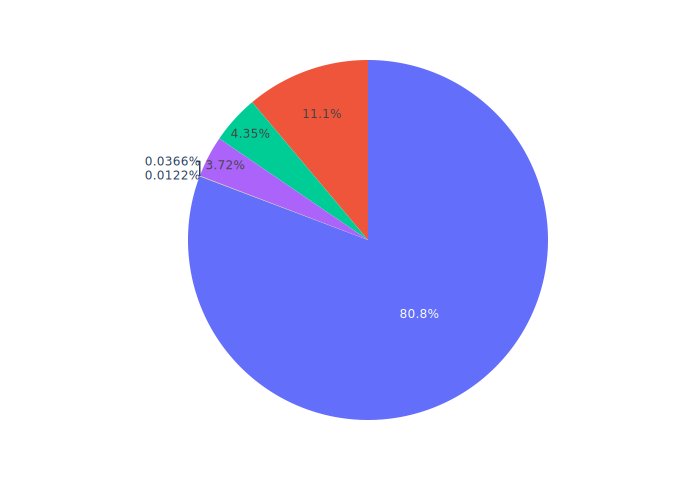

In [80]:
fig = px.pie(labels=ratings.index, values=ratings.values)

fig.show("svg")

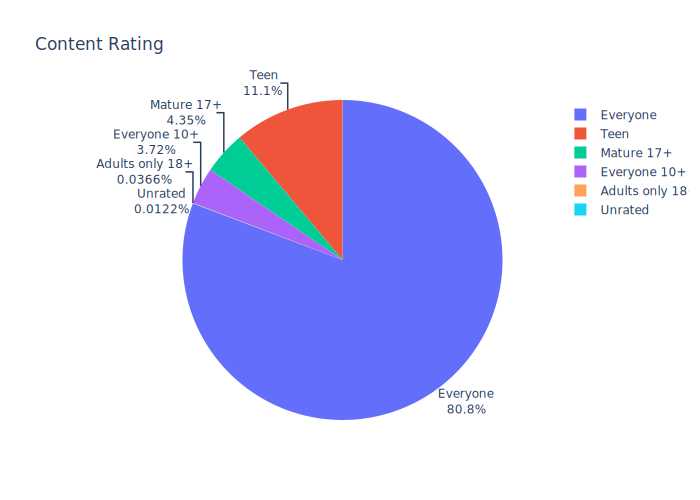

In [81]:
fig = px.pie(labels=ratings.index,
             values=ratings.values,
             title="Content Rating",
             names=ratings.index,
)
fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show("svg")

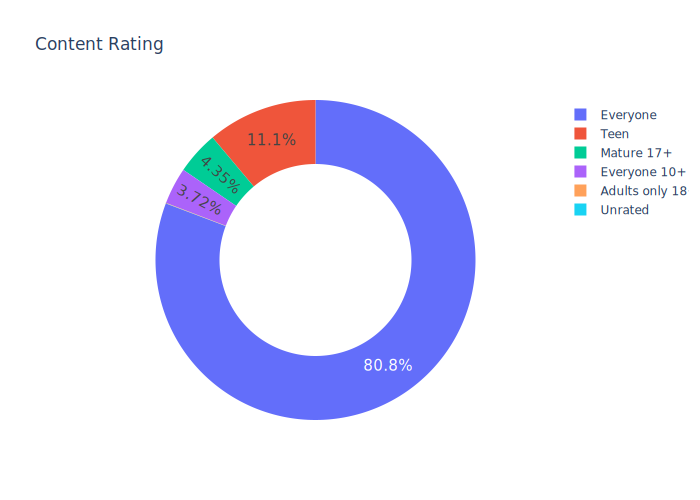

In [82]:
fig = px.pie(labels=ratings.index,
             values=ratings.values,
             title="Content Rating",
             names=ratings.index,
             hole=0.6, # makes a donut chart =)
)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

fig.show("svg")

# Numeric Type Conversion: Examine the Number of Installs

In [83]:
df_apps_clean.Installs.describe()

,Installs
count,8199
unique,19
top,"1,000,000"
freq,1417


In [84]:
df_apps_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8199 entries, 21 to 10835
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8199 non-null   object 
 1   Category        8199 non-null   object 
 2   Rating          8199 non-null   float64
 3   Reviews         8199 non-null   int64  
 4   Size_MBs        8199 non-null   float64
 5   Installs        8199 non-null   object 
 6   Type            8199 non-null   object 
 7   Price           8199 non-null   object 
 8   Content_Rating  8199 non-null   object 
 9   Genres          8199 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 704.6+ KB


In [85]:
# Installs is of data type object because of the comma (,) character
df_apps_clean[['App', 'Installs']].groupby('Installs').count()

,App
Installs,
1,3
"1,000",698
"1,000,000",1417
"1,000,000,000",20
10,69
"10,000",988
"10,000,000",933
100,303
"100,000",1096


In [86]:
df_apps_clean.Installs = df_apps_clean.Installs.astype(str).str.replace(',', "")

df_apps_clean.Installs = pd.to_numeric(df_apps_clean.Installs)
df_apps_clean[['App', 'Installs']].groupby('Installs').count()

,App
Installs,
1,3
5,9
10,69
50,56
100,303
500,199
1000,698
5000,425
10000,988


# Find the Most Expensive Apps, Filter out the Junk, and Calculate a  Sales Revenue Estimate


In [87]:
df_apps_clean.Price = df_apps_clean.Price.astype(str).str.replace('$', "")
df_apps_clean.Price = pd.to_numeric(df_apps_clean.Price)

df_apps_clean.sort_values('Price', ascending=False).head(20)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
3946,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.300000,10000,Paid,400.00,Everyone,Lifestyle
2394,I am Rich!,FINANCE,3.8,93,22.000000,1000,Paid,399.99,Everyone,Finance
2461,I AM RICH PRO PLUS,FINANCE,4.0,36,41.000000,1000,Paid,399.99,Everyone,Finance
1331,most expensive app (H),FAMILY,4.3,6,1.500000,100,Paid,399.99,Everyone,Entertainment
3145,I am rich(premium),FINANCE,3.5,472,0.942383,5000,Paid,399.99,Everyone,Finance
2775,I Am Rich Pro,FAMILY,4.4,201,2.700000,5000,Paid,399.99,Everyone,Entertainment
5765,I am rich,LIFESTYLE,3.8,3547,1.800000,100000,Paid,399.99,Everyone,Lifestyle
3221,I am Rich Plus,FAMILY,4.0,856,8.700000,10000,Paid,399.99,Everyone,Entertainment
3554,💎 I'm rich,LIFESTYLE,3.8,718,26.000000,10000,Paid,399.99,Everyone,Lifestyle
3114,I am Rich,FINANCE,4.3,180,3.800000,5000,Paid,399.99,Everyone,Finance


### The most expensive apps

In [88]:
df_apps_clean = df_apps_clean[df_apps_clean['Price'] < 250]
df_apps_clean.sort_values('Price', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
2281,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32.0,1000,Paid,79.99,Everyone,Medical
1407,LTC AS Legal,MEDICAL,4.0,6,1.3,100,Paid,39.99,Everyone,Medical
2629,I am Rich Person,LIFESTYLE,4.2,134,1.8,1000,Paid,37.99,Everyone,Lifestyle
2481,A Manual of Acupuncture,MEDICAL,3.5,214,68.0,1000,Paid,33.99,Everyone,Medical
504,AP Art History Flashcards,FAMILY,5.0,1,96.0,10,Paid,29.99,Mature 17+,Education


### Highest Grossing Paid Apps

In [89]:
df_apps_clean['Revenue_Estimate'] = df_apps_clean.Installs.mul(df_apps_clean.Price)
df_apps_clean.sort_values('Revenue_Estimate', ascending=False)[:10]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
9220,Minecraft,FAMILY,4.5,2376564,19.000000,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,69900000.0
8825,Hitman Sniper,GAME,4.6,408292,29.000000,10000000,Paid,0.99,Mature 17+,Action,9900000.0
7151,Grand Theft Auto: San Andreas,GAME,4.4,348962,26.000000,1000000,Paid,6.99,Mature 17+,Action,6990000.0
7477,Facetune - For Free,PHOTOGRAPHY,4.4,49553,48.000000,1000000,Paid,5.99,Everyone,Photography,5990000.0
7977,Sleep as Android Unlock,LIFESTYLE,4.5,23966,0.851562,1000000,Paid,5.99,Everyone,Lifestyle,5990000.0
6594,DraStic DS Emulator,GAME,4.6,87766,12.000000,1000000,Paid,4.99,Everyone,Action,4990000.0
6082,Weather Live,WEATHER,4.5,76593,4.750000,500000,Paid,5.99,Everyone,Weather,2995000.0
6746,Card Wars - Adventure Time,FAMILY,4.3,129603,23.000000,1000000,Paid,2.99,Everyone 10+,Card;Action & Adventure,2990000.0
7633,Five Nights at Freddy's,GAME,4.6,100805,50.000000,1000000,Paid,2.99,Teen,Action,2990000.0
7954,Bloons TD 5,FAMILY,4.6,190086,94.000000,1000000,Paid,2.99,Everyone,Strategy,2990000.0


# Plotly Bar Charts & Scatter Plots: Analysing App Categories

In [90]:
# Number of different categories
df_apps_clean.Category.nunique()

33

In [91]:
# Number of apps per category
top10_category = df_apps_clean.Category.value_counts()[:10]
top10_category

,count
Category,
FAMILY,1606
GAME,910
TOOLS,719
PRODUCTIVITY,301
PERSONALIZATION,298
LIFESTYLE,297
FINANCE,296
MEDICAL,292
PHOTOGRAPHY,263


### Vertical Bar Chart - Highest Competition (Number of Apps)

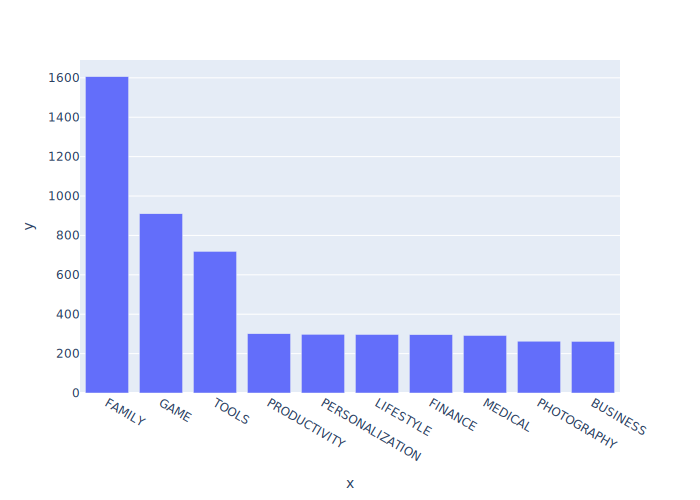

In [92]:
bar = px.bar(
        x = top10_category.index, # index = category name
        y = top10_category.values)

bar.show("svg")

### Horizontal Bar Chart - Most Popular Categories (Highest Downloads)

In [93]:
# Group apps by category and then sum the number of installations
category_installs = df_apps_clean.groupby('Category').agg({'Installs': pd.Series.sum})
category_installs.sort_values('Installs', ascending=True, inplace=True)

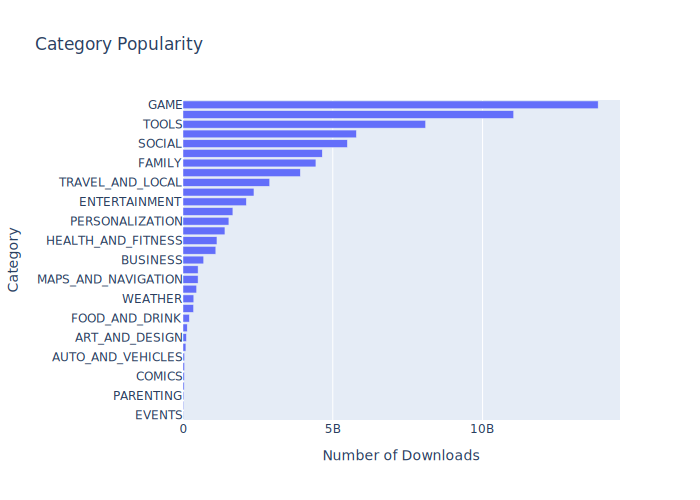

In [94]:
h_bar = px.bar(
        x = category_installs.Installs,
        y = category_installs.index,
        orientation='h',
        title='Category Popularity')

h_bar.update_layout(xaxis_title='Number of Downloads', yaxis_title='Category')
h_bar.show("svg")

### Category Concentration - Downloads vs. Competition

Use the size, hover_name and color parameters in .scatter(). To scale the yaxis, call .update_layout() and specify that the yaxis should be on a log-scale. Ex: yaxis=dict(type='log')

In [95]:
# Count the number of apps in each category (similar to what we did above)
cat_number = df_apps_clean.groupby('Category').agg({'App': pd.Series.count})
cat_merged_df = pd.merge(cat_number, category_installs, on='Category', how="inner")
print(f'The dimensions of the DataFrame are: {cat_merged_df.shape}')
cat_merged_df.sort_values('Installs', ascending=False)

The dimensions of the DataFrame are: (33, 2)


,App,Installs
Category,,
GAME,910,13858762717
COMMUNICATION,257,11039241530
TOOLS,719,8099724500
PRODUCTIVITY,301,5788070180
SOCIAL,203,5487841475
PHOTOGRAPHY,263,4649143130
FAMILY,1606,4437554490
VIDEO_PLAYERS,148,3916897200
TRAVEL_AND_LOCAL,187,2894859300


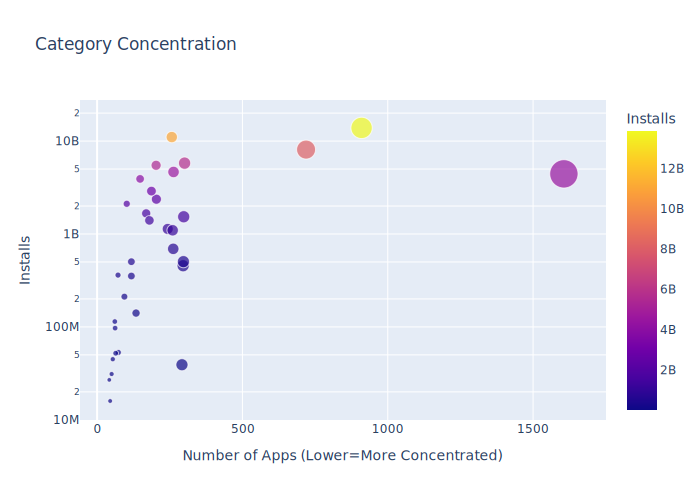

In [96]:
scatter = px.scatter(cat_merged_df, # data
                     x='App', # column name
                     y='Installs',
                     title='Category Concentration',
                     size='App',
                     hover_name=cat_merged_df.index,
                     color='Installs'
)

scatter.update_layout(xaxis_title="Number of Apps (Lower=More Concentrated)",
                      yaxis_title="Installs",
                      yaxis=dict(type='log'))

scatter.show("svg")

# Extracting Nested Data from a Column
How many different types of genres are there? Can an app belong to more than one genre? What happens when you use .value_counts() on a column with nested values? Solve the problem by using the .split() function and the DataFrame's [.stack() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html).


In [97]:
# Number of Genres?
len(df_apps_clean.Genres.unique())

114

In [98]:
# Problem: Have multiple categories seperated by ;
df_apps_clean.Genres.value_counts().sort_values(ascending=True)[:5]

,count
Genres,
Adventure;Education,1
Lifestyle;Pretend Play,1
Strategy;Education,1
Communication;Creativity,1
Music & Audio;Music & Video,1


In [99]:
# Split the strings on the semi-colon and then .stack them.
stack = df_apps_clean.Genres.str.split(';', expand=True).stack()
print(f'We now have a single column with shape: {stack.shape}')
num_genres = stack.value_counts()
print(f'Number of genres: {len(num_genres)}')

We now have a single column with shape: (8564,)
Number of genres: 53


# Colour Scales in Plotly Charts - Competition in Genres

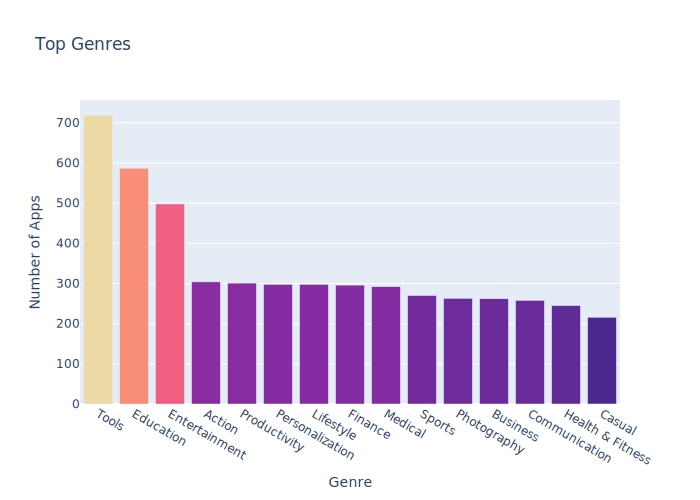

In [100]:
bar = px.bar(
        x = num_genres.index[:15], # index = category name
        y = num_genres.values[:15], # count
        title='Top Genres',
        hover_name=num_genres.index[:15],
        color=num_genres.values[:15],
        color_continuous_scale='Agsunset'
)

bar.update_layout(xaxis_title='Genre',
                  yaxis_title='Number of Apps',
                  coloraxis_showscale=False)

bar.show("svg")

# Grouped Bar Charts: Free vs. Paid Apps per Category

In [101]:
df_apps_clean.Type.value_counts()

,count
Type,
Free,7595
Paid,589


In [102]:
df_free_vs_paid = df_apps_clean.groupby(["Category", "Type"],
                                      as_index=False).agg({'App': pd.Series.count})
df_free_vs_paid.sort_values('App')

,Category,Type,App
3,AUTO_AND_VEHICLES,Paid,1
17,ENTERTAINMENT,Paid,2
24,FOOD_AND_DRINK,Paid,2
38,NEWS_AND_MAGAZINES,Paid,2
48,SHOPPING,Paid,2
...,...,...,...
31,LIFESTYLE,Free,284
21,FINANCE,Free,289
53,TOOLS,Free,656
25,GAME,Free,834


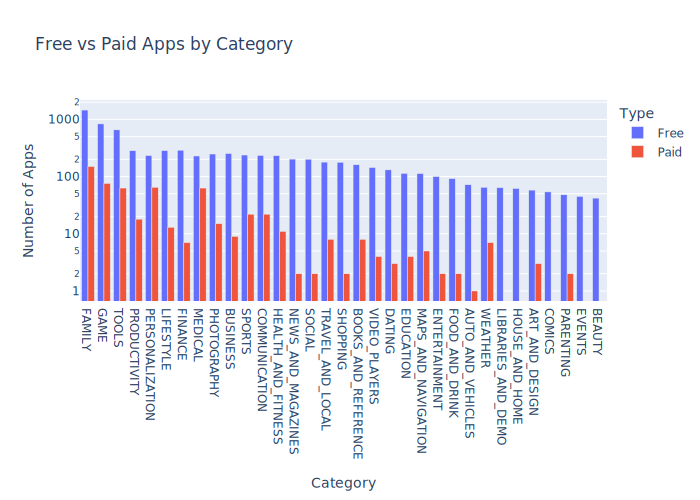

In [103]:
g_bar = px.bar(df_free_vs_paid,
               x='Category',
               y='App',
               title='Free vs Paid Apps by Category',
               color='Type',
               barmode='group',)

g_bar.update_layout(xaxis_title='Category',
                    yaxis_title='Number of Apps',
                    xaxis={'categoryorder':'total descending'},
                    yaxis=dict(type='log'),
                    )

g_bar.show("svg")

# Plotly Box Plots

Create a box plot that shows the number of Installs for free versus paid apps.

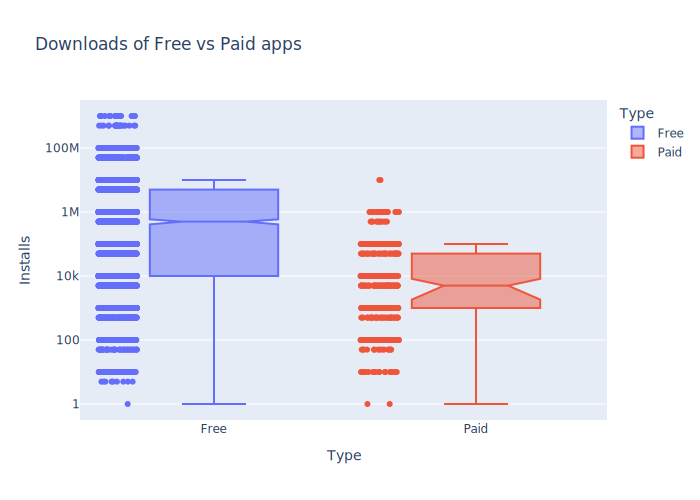

In [104]:
box = px.box(df_apps_clean,
             y='Installs',
             x='Type',
             color='Type',
             notched=True,
             points='all',
             title='Downloads of Free vs Paid apps'
)

box.update_layout(yaxis=dict(type='log'))

box.show("svg")


# Plotly Box Plots: Revenue by App Category

In [105]:
df_paid_apps = df_apps_clean[df_apps_clean['Type'] == 'Paid']

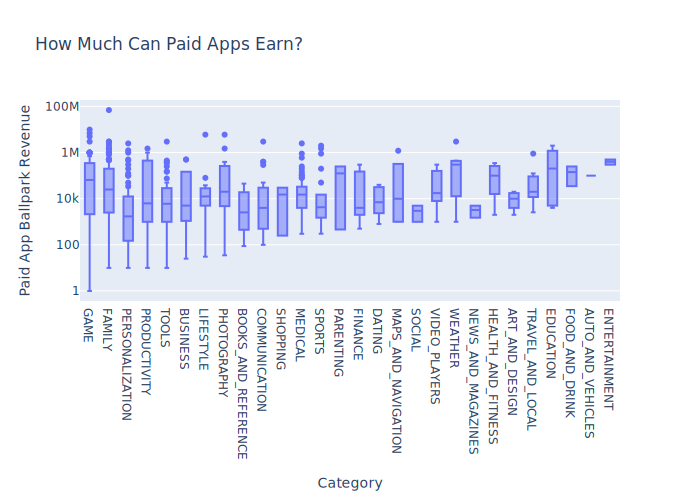

In [106]:
box = px.box(df_paid_apps,
             x='Category',
             y='Revenue_Estimate',
             title='How Much Can Paid Apps Earn?')

box.update_layout(xaxis_title='Category',
                  yaxis_title='Paid App Ballpark Revenue',
                  xaxis={'categoryorder':'min ascending'},
                  yaxis=dict(type='log'))


box.show("svg")

Examine Paid App Pricing Strategies by Category


In [107]:
df_paid_apps.Price.median()

2.99

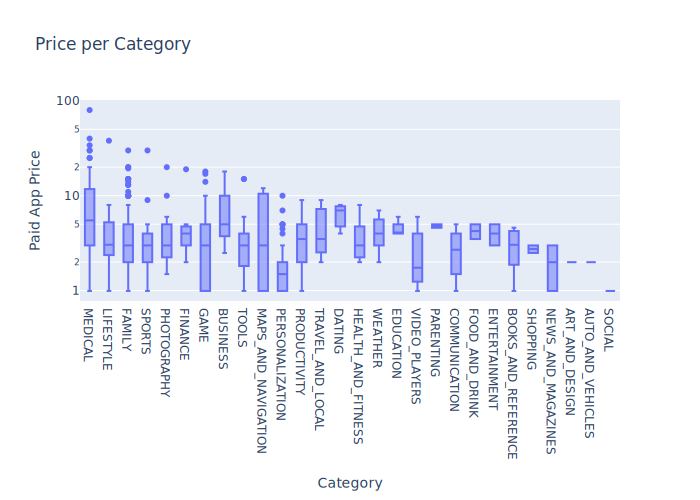

In [108]:
box = px.box(df_paid_apps,
             x='Category',
             y="Price",
             title='Price per Category')

box.update_layout(xaxis_title='Category',
                  yaxis_title='Paid App Price',
                  xaxis={'categoryorder':'max descending'},
                  yaxis=dict(type='log'))


box.show("svg")